# Part 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
data = pd.read_csv('./retail_transactions.csv')

In [4]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0     546729     22775  PURPLE DRAWERKNOB ACRYLIC EDWARDIAN        12   
1     559898     21868                 POTTING SHED TEA MUG         6   
2     548648     71459       HANGING JAM JAR T-LIGHT HOLDER        24   
3     540543     22173   METAL 4 HOOK HANGER FRENCH CHATEAU         4   
4     561390     20726                   LUNCH BAG WOODLAND        10   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2011-03-16 11:36:00       1.25     18231.0  United Kingdom  
1  2011-07-13 12:18:00       1.25     16225.0  United Kingdom  
2  2011-04-01 13:20:00       0.85     12949.0  United Kingdom  
3  2011-01-09 15:23:00       2.95     14395.0  United Kingdom  
4  2011-07-27 09:52:00       1.65     17068.0  United Kingdom

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  int64  
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 18.2+ MB


In [6]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [7]:
data['Year'] = data['InvoiceDate'].dt.year

In [8]:
data['Revenue'] = data.Quantity * data.UnitPrice

In [9]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0     546729     22775  PURPLE DRAWERKNOB ACRYLIC EDWARDIAN        12   
1     559898     21868                 POTTING SHED TEA MUG         6   
2     548648     71459       HANGING JAM JAR T-LIGHT HOLDER        24   
3     540543     22173   METAL 4 HOOK HANGER FRENCH CHATEAU         4   
4     561390     20726                   LUNCH BAG WOODLAND        10   

          InvoiceDate  UnitPrice  CustomerID         Country  Year  Revenue  
0 2011-03-16 11:36:00       1.25     18231.0  United Kingdom  2011     15.0  
1 2011-07-13 12:18:00       1.25     16225.0  United Kingdom  2011      7.5  
2 2011-04-01 13:20:00       0.85     12949.0  United Kingdom  2011     20.4  
3 2011-01-09 15:23:00       2.95     14395.0  United Kingdom  2011     11.8  
4 2011-07-27 09:52:00       1.65     17068.0  United Kingdom  2011     16.5

In [10]:
data['days_since'] = pd.Timestamp(year=2010,month=12,day=31).dayofyear - data[data.Year == 2010]['InvoiceDate'].apply(lambda x: x.dayofyear)

In [11]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0     546729     22775  PURPLE DRAWERKNOB ACRYLIC EDWARDIAN        12   
1     559898     21868                 POTTING SHED TEA MUG         6   
2     548648     71459       HANGING JAM JAR T-LIGHT HOLDER        24   
3     540543     22173   METAL 4 HOOK HANGER FRENCH CHATEAU         4   
4     561390     20726                   LUNCH BAG WOODLAND        10   

          InvoiceDate  UnitPrice  CustomerID         Country  Year  Revenue  \
0 2011-03-16 11:36:00       1.25     18231.0  United Kingdom  2011     15.0   
1 2011-07-13 12:18:00       1.25     16225.0  United Kingdom  2011      7.5   
2 2011-04-01 13:20:00       0.85     12949.0  United Kingdom  2011     20.4   
3 2011-01-09 15:23:00       2.95     14395.0  United Kingdom  2011     11.8   
4 2011-07-27 09:52:00       1.65     17068.0  United Kingdom  2011     16.5   

   days_since  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [12]:
X = data[data.Year==2010].groupby('CustomerID').agg({'Revenue':'sum','days_since':['max','min','nunique']})

In [13]:
X.columns = ['2010_revenue','days_since_first_purchase','days_since_last_purchase','number_of_purchase']

In [14]:
X['avg_order_cost'] = X['2010_revenue']/X['number_of_purchase']

In [15]:
X.head()

2010_revenue  days_since_first_purchase  days_since_last_purchase  \
CustomerID                                                                      
12347.0           711.79                       24.0                      24.0   
12348.0           892.80                       15.0                      15.0   
12370.0          1868.02                       17.0                      14.0   
12377.0          1001.52                       11.0                      11.0   
12383.0           600.72                        9.0                       9.0   

            number_of_purchase  avg_order_cost  
CustomerID                                      
12347.0                      1          711.79  
12348.0                      1          892.80  
12370.0                      2          934.01  
12377.0                      1         1001.52  
12383.0                      1          600.72

In [16]:
revenue_2011 = data[['CustomerID','Revenue']][data.Year == 2011].groupby('CustomerID',as_index=False).sum()

In [17]:
revenue_2011.head()

CustomerID   Revenue
0     12346.0  77183.60
1     12347.0   3598.21
2     12348.0    904.44
3     12349.0   1757.55
4     12350.0    334.40

In [18]:
X = pd.merge(X,revenue_2011,how='left',on='CustomerID').set_index('CustomerID')

In [19]:
X.head()

2010_revenue  days_since_first_purchase  days_since_last_purchase  \
CustomerID                                                                      
12347.0           711.79                       24.0                      24.0   
12348.0           892.80                       15.0                      15.0   
12370.0          1868.02                       17.0                      14.0   
12377.0          1001.52                       11.0                      11.0   
12383.0           600.72                        9.0                       9.0   

            number_of_purchase  avg_order_cost  Revenue  
CustomerID                                               
12347.0                      1          711.79  3598.21  
12348.0                      1          892.80   904.44  
12370.0                      2          934.01  1677.67  
12377.0                      1         1001.52   626.60  
12383.0                      1          600.72  1249.84

In [20]:
X.rename(columns={'Revenue':'2011_revenue'},inplace=True)

In [21]:
X.head()

2010_revenue  days_since_first_purchase  days_since_last_purchase  \
CustomerID                                                                      
12347.0           711.79                       24.0                      24.0   
12348.0           892.80                       15.0                      15.0   
12370.0          1868.02                       17.0                      14.0   
12377.0          1001.52                       11.0                      11.0   
12383.0           600.72                        9.0                       9.0   

            number_of_purchase  avg_order_cost  2011_revenue  
CustomerID                                                    
12347.0                      1          711.79       3598.21  
12348.0                      1          892.80        904.44  
12370.0                      2          934.01       1677.67  
12377.0                      1         1001.52        626.60  
12383.0                      1          600.72       1249.84

In [22]:
#Xử lý dữ liệu thiếu:

In [23]:
X.dropna(inplace=True)

In [24]:
X.head()

2010_revenue  days_since_first_purchase  days_since_last_purchase  \
CustomerID                                                                      
12347.0           711.79                       24.0                      24.0   
12348.0           892.80                       15.0                      15.0   
12370.0          1868.02                       17.0                      14.0   
12377.0          1001.52                       11.0                      11.0   
12383.0           600.72                        9.0                       9.0   

            number_of_purchase  avg_order_cost  2011_revenue  
CustomerID                                                    
12347.0                      1          711.79       3598.21  
12348.0                      1          892.80        904.44  
12370.0                      2          934.01       1677.67  
12377.0                      1         1001.52        626.60  
12383.0                      1          600.72       1249.84

In [25]:
#Xử lý outlier:

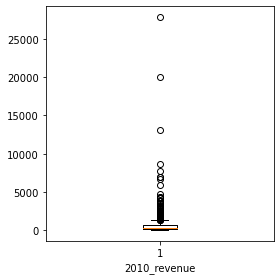

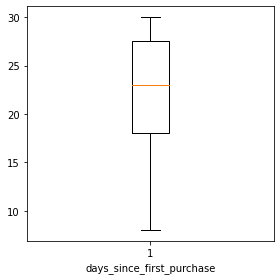

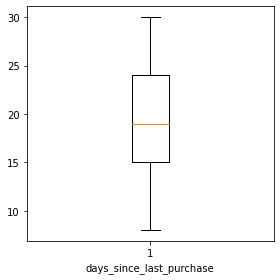

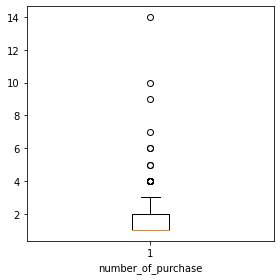

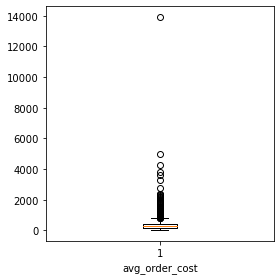

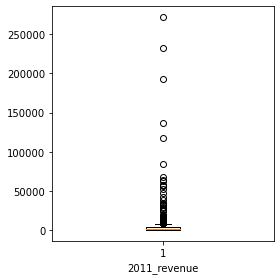

In [26]:
for i in X.columns:
    plt.figure(figsize=(4,4))
    #plt.subplot(2,3,k)
    plt.boxplot(X[i])
    plt.xlabel(i)
    plt.tight_layout();

In [27]:
#Vì dữ liệu không phải phân phối chuẩn nên ta sử dụng z-score để loại bỏ outlier:

In [28]:
X = X[X['2011_revenue'] < 3*X['2011_revenue'].std() + X['2011_revenue'].mean()]

In [29]:
X = X[X['2010_revenue'] < 3*X['2010_revenue'].std() + X['2010_revenue'].mean()]

In [30]:
X.head()

2010_revenue  days_since_first_purchase  days_since_last_purchase  \
CustomerID                                                                      
12347.0           711.79                       24.0                      24.0   
12348.0           892.80                       15.0                      15.0   
12370.0          1868.02                       17.0                      14.0   
12377.0          1001.52                       11.0                      11.0   
12383.0           600.72                        9.0                       9.0   

            number_of_purchase  avg_order_cost  2011_revenue  
CustomerID                                                    
12347.0                      1          711.79       3598.21  
12348.0                      1          892.80        904.44  
12370.0                      2          934.01       1677.67  
12377.0                      1         1001.52        626.60  
12383.0                      1          600.72       1249.84

In [31]:
X.to_csv('wrangled_transactions.csv')

# Part 2

In [32]:
from pandas_profiling import profile_report

In [33]:
df = pd.read_csv('./wrangled_transactions.csv',index_col='CustomerID')

In [34]:
df.profile_report()

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Xây dựng model với mô hình từ dữ liệu gốc:

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [36]:
X1 = df[['2010_revenue', 'days_since_last_purchase','number_of_purchase', 'avg_order_cost']]
y1 = df['2011_revenue']

In [37]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size = 0.2)

In [38]:
model_1 = LinearRegression()
model_1.fit(X1_train,y1_train)

LinearRegression()

In [39]:
y1_pred = model_1.predict(X1_test)

In [40]:
#đánh giá model1:
print("R^2 trên toàn dữ liệu :", model_1.score(X1,y1))
print("R^2 trên dữ liệu train :",model_1.score(X1_train,y1_train))
print("R^2 trên dữ liệu test :",model_1.score(X1_test,y1_test))
print('MSE :', mean_squared_error(y1_test,y1_pred))
print('MAE :', mean_absolute_error(y1_test,y1_pred))

R^2 trên toàn dữ liệu : 0.24041602476170065
R^2 trên dữ liệu train : 0.2121349596826836
R^2 trên dữ liệu test : 0.3820952947779036
MSE : 14025943.576852681
MAE : 2088.867523164621


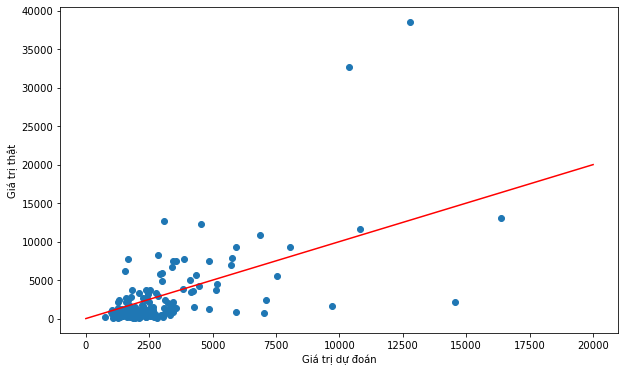

In [41]:
#Mô hình hóa kết quả:
plt.figure(figsize=(10,6))
plt.scatter(y1_pred,y1_test)
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Giá trị thật');
plt.plot((0,20000),(0,20000),'r');

##### Nhận xét:
Với dữ liệu thô ban đầu nhận thấy thông số R^2 thấp trong khi MSE/MAE lại quá cao, cần biến đổi data hoặc chọn một mô hình khác. 

### Áp dụng Log Scaler:

##### Nhận thấy các cột 2010_revenue, 2011_revenue, number_of_purchase và avg_order_cost lệch phải nên ta sẽ sử dụng Log Scaler cho những cột này

In [42]:
df['2010_revenue_log'] = np.log(df['2010_revenue'])
df['number_of_purchase_log'] = np.log(df['number_of_purchase'])
df['avg_order_cost_log'] = np.log(df['avg_order_cost'])
df['2011_revenue_log'] = np.log(df['2011_revenue'])

In [43]:
X2 = df[['2010_revenue_log', 'days_since_last_purchase','number_of_purchase_log', 'avg_order_cost_log']]
y2 = df['2011_revenue_log']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size = 0.2)

In [44]:
model_2 = LinearRegression()
model_2.fit(X2_train,y2_train)
y2_pred = model_2.predict(X2_test)

In [45]:
#đánh giá model1:
print("R^2 trên toàn dữ liệu :", model_2.score(X2,y2))
print("R^2 trên dữ liệu train :",model_2.score(X2_train,y2_train))
print("R^2 trên dữ liệu test :",model_2.score(X2_test,y2_test))
print('MSE :', mean_squared_error(y2_test,y2_pred))
print('MAE :', mean_absolute_error(y2_test,y2_pred))

R^2 trên toàn dữ liệu : 0.30698469046660426
R^2 trên dữ liệu train : 0.32965259439028305
R^2 trên dữ liệu test : 0.20281968617677693
MSE : 1.3207809042450438
MAE : 0.8650896890949263


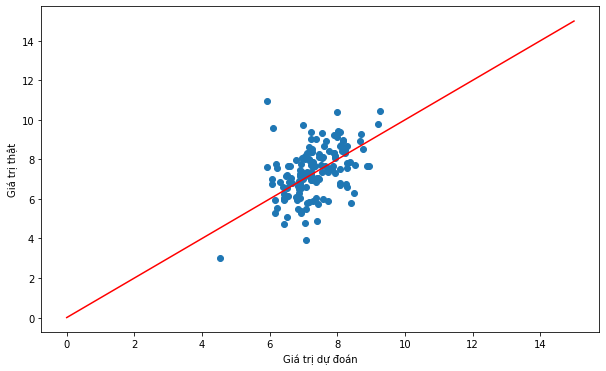

In [46]:
#Mô hình hóa kết quả:
plt.figure(figsize=(10,6))
plt.scatter(y2_pred,y2_test)
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Giá trị thật');
plt.plot((0,15),(0,15),'r');

##### Nhận xét:
Sau khi sử dụng Log scaler thì nhận mấy model đã cải thiện hơn, tuy nhiên vẫn chưa hiệu quả trong việc giải quyết bài toán. 

### Áp dụng Robust Scaler

In [47]:
from sklearn.preprocessing import robust_scale

In [48]:
X_Robust = robust_scale(X2)
X3_train, X3_test, y3_train, y3_test = train_test_split(X_Robust,y2,test_size = 0.2)

In [49]:
model_3 = LinearRegression()
model_3.fit(X3_train,y3_train)
y3_pred = model_3.predict(X3_test)

In [50]:
#đánh giá model1:
print("R^2 trên toàn dữ liệu :", model_3.score(X_Robust,y2))
print("R^2 trên dữ liệu train :",model_3.score(X3_train,y3_train))
print("R^2 trên dữ liệu test :",model_3.score(X3_test,y3_test))
print('MSE :', mean_squared_error(y3_test,y3_pred))
print('MAE :', mean_absolute_error(y3_test,y3_pred))

R^2 trên toàn dữ liệu : 0.3062834844999247
R^2 trên dữ liệu train : 0.2768952101803279
R^2 trên dữ liệu test : 0.4024478214620858
MSE : 1.2320331716091213
MAE : 0.8464291141223923


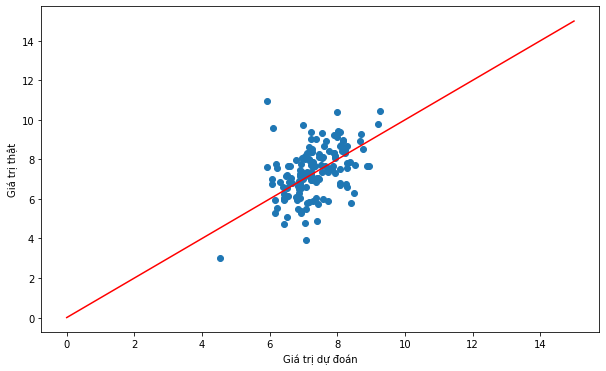

In [51]:
#Mô hình hóa kết quả:
plt.figure(figsize=(10,6))
plt.scatter(y2_pred,y2_test)
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Giá trị thật');
plt.plot((0,15),(0,15),'r');

##### Nhận xét:
Sử dụng Robust Scaler không cải thiện được kết quả.

### Áp dụng lựa chọn feature theo correlation:

In [195]:
df.corr()['2011_revenue'].sort_values()

days_since_last_purchase    -0.103928
days_since_first_purchase    0.080847
number_of_purchase_log       0.264348
number_of_purchase           0.287175
avg_order_cost_log           0.316348
avg_order_cost               0.352477
2010_revenue_log             0.399318
2010_revenue                 0.491060
2011_revenue_log             0.686019
2011_revenue                 1.000000
Name: 2011_revenue, dtype: float64

In [53]:
df.columns

Index(['2010_revenue', 'days_since_first_purchase', 'days_since_last_purchase',
       'number_of_purchase', 'avg_order_cost', '2011_revenue',
       '2010_revenue_log', 'number_of_purchase_log', 'avg_order_cost_log',
       '2011_revenue_log'],
      dtype='object')

In [54]:
X4 = df[['2010_revenue','avg_order_cost']]
y4 = df['2011_revenue']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4,test_size = 0.2)

In [55]:
model_4 = LinearRegression()
model_4.fit(X4_train,y4_train)
y4_pred = model_4.predict(X4_test)

In [56]:
#đánh giá model1:
print("R^2 trên toàn dữ liệu :", model_4.score(X4,y4))
print("R^2 trên dữ liệu train :",model_4.score(X4_train,y4_train))
print("R^2 trên dữ liệu test :",model_4.score(X4_test,y4_test))
print('MSE :', mean_squared_error(y4_test,y4_pred))
print('MAE :', mean_absolute_error(y4_test,y4_pred))

R^2 trên toàn dữ liệu : 0.24210778833313795
R^2 trên dữ liệu train : 0.2673047661774717
R^2 trên dữ liệu test : 0.1782878173792598
MSE : 35071635.83477854
MAE : 2610.897886893976


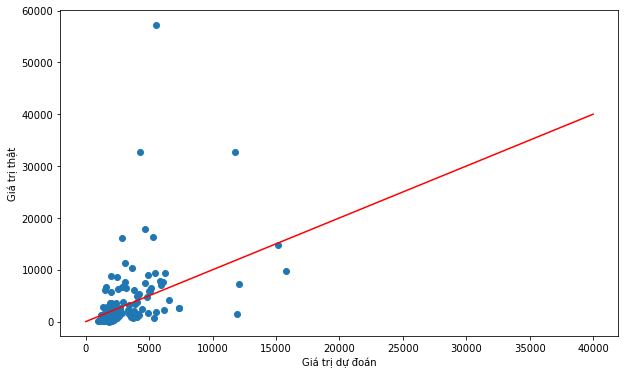

In [57]:
#Mô hình hóa kết quả:
plt.figure(figsize=(10,6))
plt.scatter(y4_pred,y4_test)
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Giá trị thật');
plt.plot((0,40000),(0,40000),'r');

##### Nhận xét:
Mô hình không hiệu quả

### Áp dụng polinomial:`

In [58]:
from sklearn.preprocessing import PolynomialFeatures

In [77]:
pr = PolynomialFeatures(degree=2)

In [78]:
X_pr = pr.fit_transform(X_Robust)

In [79]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X_pr,y2,test_size = 0.2)

In [80]:
model_5 = LinearRegression()
model_5.fit(X5_train,y5_train)
y5_pred = model_5.predict(X5_test)

In [81]:
#đánh giá model1:
print("R^2 trên toàn dữ liệu :", model_5.score(X_pr,y2))
print("R^2 trên dữ liệu train :",model_5.score(X5_train,y5_train))
print("R^2 trên dữ liệu test :",model_5.score(X5_test,y5_test))
print('MSE :', mean_squared_error(y5_test,y5_pred))
print('MAE :', mean_absolute_error(y5_test,y5_pred))

R^2 trên toàn dữ liệu : 0.3207101501334788
R^2 trên dữ liệu train : 0.3447822190212747
R^2 trên dữ liệu test : 0.18749123353471775
MSE : 1.2542918755722814
MAE : 0.8712138315887347


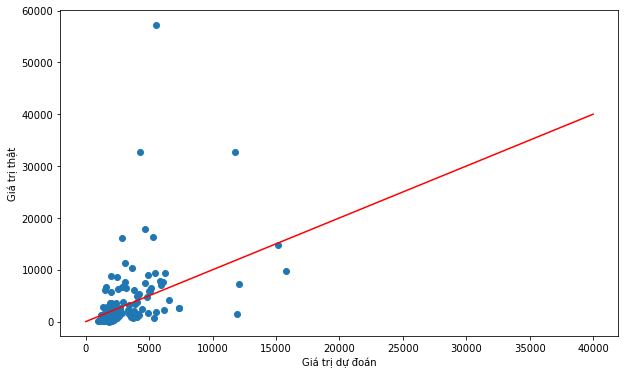

In [82]:
#Mô hình hóa kết quả:
plt.figure(figsize=(10,6))
plt.scatter(y4_pred,y4_test)
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Giá trị thật');
plt.plot((0,40000),(0,40000),'r');

##### Nhận xét:
Mô hình không hiệu quả cho bài toán ít dữ liệu

### Lựa chọn thuật toán khác

In [94]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from datetime import datetime

In [203]:
X_new = X_Robust
y_new = y2

In [204]:
models = [LinearRegression(),RandomForestRegressor(n_estimators=50),KNeighborsRegressor(n_neighbors=13),DecisionTreeRegressor(max_depth=4),SVR(),AdaBoostRegressor()]

In [205]:
model_merits = []

In [206]:
for model in models:
    model_name = model.__class__.__name__
    score_train_lst = []
    score_test_lst = []
    diff = []
    time_lst = []
    for i in range(0,10):
        X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=0.2)
        start_time = datetime.now()
        model.fit(X_train,y_train)
        end_time = datetime.now()
        score_train = model.score(X_train,y_train)
        score_test = model.score(X_test,y_test)
        abs_score = np.abs(score_train-score_test)
        time = (end_time - start_time).seconds
        score_train_lst.append(score_train)
        score_test_lst.append(score_test)
        diff.append(abs_score)
        time_lst.append(time)
    print(model_name,round(np.mean(score_train_lst),ndigits=4),round(np.mean(score_test_lst),ndigits=4),round(np.mean(diff),ndigits=4),np.mean(time_lst))
    model_merits.append([model_name,np.mean(score_train_lst),np.mean(score_test_lst),np.mean(diff),np.mean(time_lst)])
    #print(model_merits)

LinearRegression 0.2994 0.3278 0.038 0.0
RandomForestRegressor 0.8742 -0.0119 0.8861 0.0
KNeighborsRegressor 0.353 0.2783 0.0907 0.0
DecisionTreeRegressor 0.3959 0.2043 0.1916 0.0
SVR 0.3273 0.2844 0.0566 0.0
AdaBoostRegressor 0.342 0.2834 0.0595 0.0


In [207]:
pd.DataFrame(model_merits,columns=['model_name','train_score_mean','test_score_mean','Diff','Run_time'])

model_name  train_score_mean  test_score_mean      Diff  \
0       LinearRegression          0.299410         0.327769  0.037972   
1  RandomForestRegressor          0.874224        -0.011896  0.886121   
2    KNeighborsRegressor          0.352994         0.278300  0.090689   
3  DecisionTreeRegressor          0.395887         0.204254  0.191633   
4                    SVR          0.327324         0.284366  0.056594   
5      AdaBoostRegressor          0.342047         0.283430  0.059522   

   Run_time  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
5       0.0

##### Nhận xét:
Dữ liệu không tốt để dự đoán cho năm 2011. Cần thu thập thêm